## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix


## Import Dataset

In [2]:
# Dataset
final_data = pd.read_csv('Data/Final Data.csv')
final_data.head()

,Artist,Title,Label,Path,choruspath,chroma_stft_kew_0,chroma_stft_min_0,chroma_stft_max_0,chroma_stft_std_0,chroma_stft_mean_0,...,tonnetz_mean_5,tonnetz_median_5,tonnetz_kurtosis_5,zero_crossing_rate_kew_0,zero_crossing_rate_min_0,zero_crossing_rate_max_0,zero_crossing_rate_std_0,zero_crossing_rate_mean_0,zero_crossing_rate_median_0,zero_crossing_rate_kurtosis_0
0,The Weeknd,Blinding Lights,1,Songs/The Weeknd - Blinding Lights (Official V...,Songs/RepeatedPopularChorus/The Weeknd - Blind...,0.091806,0.049545,1.0,0.306971,0.570429,...,0.007217,-0.000351,-0.410349,-0.604349,0.022585,0.102132,0.017701,0.072071,0.074626,0.012681
1,Olivia Rodrigo,Good 4 U,1,Songs/Olivia Rodrigo - good 4 u (Official Vide...,Songs/RepeatedPopularChorus/Olivia Rodrigo - g...,1.025965,0.007265,1.0,0.274179,0.350277,...,-0.011851,-0.010293,0.099909,-0.233246,0.057460,0.229705,0.035304,0.147578,0.157302,-0.281870
2,Olivia Rodrigo,Drivers License,1,Songs/Olivia Rodrigo - drivers license (Offici...,Songs/RepeatedPopularChorus/Olivia Rodrigo - d...,1.395750,0.000648,1.0,0.307888,0.236975,...,0.001545,-0.009260,0.360879,0.742759,0.023492,0.178957,0.032571,0.077563,0.066463,-0.180427
3,Lil Nas X,Montero (Call Me By Your Name),1,Songs/Lil Nas X - MONTERO (Call Me By Your Nam...,Songs/RepeatedPopularChorus/Lil Nas X - MONTER...,0.926616,0.003467,1.0,0.242382,0.301311,...,-0.014834,-0.023444,0.456362,0.524002,0.051111,0.277596,0.045581,0.147997,0.142472,-0.344706
4,BTS,Butter,1,Songs/BTS (방탄소년단) 'Butter' Official MV.mp3,Songs/RepeatedPopularChorus/BTS (방탄소년단) 'Butte...,0.311976,0.037900,1.0,0.336300,0.517165,...,0.005743,0.005232,-0.153372,2.700198,0.046848,0.235737,0.030815,0.097298,0.090204,7.939578


In [3]:
final_data.tail()

,Artist,Title,Label,Path,choruspath,chroma_stft_kew_0,chroma_stft_min_0,chroma_stft_max_0,chroma_stft_std_0,chroma_stft_mean_0,...,tonnetz_mean_5,tonnetz_median_5,tonnetz_kurtosis_5,zero_crossing_rate_kew_0,zero_crossing_rate_min_0,zero_crossing_rate_max_0,zero_crossing_rate_std_0,zero_crossing_rate_mean_0,zero_crossing_rate_median_0,zero_crossing_rate_kurtosis_0
746,Gwen Stefani,Crash,0,Unpopular/Gwen Stefani - Crash.mp3,Unpopular/RepeatedUnpopularChorus/Gwen Stefani...,0.257423,0.023126,1.0,0.312051,0.498186,...,-0.029707,-0.026805,0.892997,1.622096,0.057732,0.331247,0.044447,0.155034,0.142721,3.141514
747,Gwen Stefani,Luxurious,0,Unpopular/Gwen Stefani - Luxurious (Remix Vers...,Unpopular/RepeatedUnpopularChorus/Gwen Stefani...,-0.020788,0.013594,1.0,0.327147,0.570372,...,0.002858,0.007586,0.429635,1.686463,0.045261,0.415374,0.070371,0.156106,0.137642,3.006131
748,Rihanna,If It's Lovin' That You Want,0,Unpopular/Rihanna - If It's Lovin' That You Wa...,Unpopular/RepeatedUnpopularChorus/Rihanna - If...,0.560998,0.000398,1.0,0.302554,0.458398,...,0.004888,0.000771,-0.075453,0.344456,0.025941,0.214603,0.035465,0.114828,0.112834,0.024774
749,Alicia Keys,Unbreakable,0,Unpopular/Alicia Keys - Unbreakable (Official ...,Unpopular/RepeatedUnpopularChorus/Alicia Keys ...,0.412242,0.028240,1.0,0.291556,0.489242,...,0.017730,-0.001053,1.118338,0.823857,0.010113,0.067619,0.012221,0.029605,0.029252,0.587163
750,Rascal Flatts,Skin (Sarabeth),0,Unpopular/Rascal Flatts - Skin (Sarabeth) (Off...,Unpopular/RepeatedUnpopularChorus/Rascal Flatt...,1.654606,0.007226,1.0,0.226309,0.212402,...,0.031773,0.016269,-0.560244,1.163344,0.022177,0.128571,0.024907,0.057123,0.050000,0.813294


## Data Preprocessing

In [4]:
# Describe
final_data.describe()

,Label,chroma_stft_kew_0,chroma_stft_min_0,chroma_stft_max_0,chroma_stft_std_0,chroma_stft_mean_0,chroma_stft_median_0,chroma_stft_kurtosis_0,chroma_stft_kew_1,chroma_stft_min_1,...,tonnetz_mean_5,tonnetz_median_5,tonnetz_kurtosis_5,zero_crossing_rate_kew_0,zero_crossing_rate_min_0,zero_crossing_rate_max_0,zero_crossing_rate_std_0,zero_crossing_rate_mean_0,zero_crossing_rate_median_0,zero_crossing_rate_kurtosis_0
count,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,...,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000
mean,0.487350,0.784881,0.017778,0.999902,0.278146,0.398333,0.332541,0.013318,0.828556,0.017707,...,0.001922,-0.002648,0.604092,0.262655,0.040430,0.165769,0.025080,0.099949,0.097418,0.620980
std,0.500173,0.566697,0.017097,0.002163,0.051261,0.116654,0.142720,1.646738,0.552700,0.017664,...,0.023752,0.023292,1.676466,0.779992,0.020172,0.055000,0.011336,0.035043,0.036481,1.554947
min,0.000000,-0.716234,0.000111,0.943199,0.135118,0.105444,0.035526,-1.758703,-0.797281,0.000086,...,-0.074555,-0.070531,-1.516235,-2.106936,0.001678,0.024308,0.003582,0.014478,0.013197,-1.570341
25%,0.000000,0.417220,0.006177,1.000000,0.242600,0.310458,0.232786,-1.083990,0.479633,0.005409,...,-0.011828,-0.015698,-0.294101,-0.210783,0.025079,0.128163,0.016995,0.073220,0.069887,-0.399981
50%,0.000000,0.768329,0.013053,1.000000,0.278183,0.392428,0.313183,-0.449339,0.826608,0.012924,...,0.001545,-0.002020,0.248150,0.199022,0.038866,0.163265,0.022816,0.099965,0.097891,0.141164
75%,1.000000,1.143469,0.023679,1.000000,0.316032,0.478118,0.415318,0.620105,1.161217,0.023705,...,0.012292,0.007947,1.033438,0.712033,0.055488,0.198980,0.031181,0.124223,0.121372,1.180682
max,1.000000,3.263309,0.157747,1.000000,0.425101,0.749852,0.871017,12.883851,3.154988,0.153868,...,0.127281,0.138906,15.994810,3.064681,0.095918,0.415374,0.072621,0.212852,0.217528,9.890175


In [5]:
# Info
final_data.dtypes

Artist                            object
Title                             object
Label                              int64
Path                              object
choruspath                        object
                                  ...   
zero_crossing_rate_max_0         float64
zero_crossing_rate_std_0         float64
zero_crossing_rate_mean_0        float64
zero_crossing_rate_median_0      float64
zero_crossing_rate_kurtosis_0    float64
Length: 523, dtype: object

In [6]:
# Checking any 'null' values
final_data.isna().sum()

Artist                           0
Title                            0
Label                            0
Path                             0
choruspath                       0
                                ..
zero_crossing_rate_max_0         0
zero_crossing_rate_std_0         0
zero_crossing_rate_mean_0        0
zero_crossing_rate_median_0      0
zero_crossing_rate_kurtosis_0    0
Length: 523, dtype: int64

In [7]:
final_data['Artist'].value_counts()

Taylor Swift         43
Drake                34
Justin Bieber        27
Carrie Underwood     26
The Weeknd           24
                     ..
LMFAO                 3
Pharrell Williams     2
Mary J. Blige         2
The Chainsmokers      1
T.I.                  1
Name: Artist, Length: 71, dtype: int64

In [8]:
final_data['Title'].value_counts()

Blinding Lights         1
Go Flex                 1
Candy Paint             1
...Ready For It?        1
My Dawg                 1
                       ..
Bad Romance             1
Rude Boy                1
Not Afraid              1
Your Love Is My Drug    1
Skin (Sarabeth)         1
Name: Title, Length: 751, dtype: int64

In [9]:
dataset  = final_data.copy()
dataset.head()

,Artist,Title,Label,Path,choruspath,chroma_stft_kew_0,chroma_stft_min_0,chroma_stft_max_0,chroma_stft_std_0,chroma_stft_mean_0,...,tonnetz_mean_5,tonnetz_median_5,tonnetz_kurtosis_5,zero_crossing_rate_kew_0,zero_crossing_rate_min_0,zero_crossing_rate_max_0,zero_crossing_rate_std_0,zero_crossing_rate_mean_0,zero_crossing_rate_median_0,zero_crossing_rate_kurtosis_0
0,The Weeknd,Blinding Lights,1,Songs/The Weeknd - Blinding Lights (Official V...,Songs/RepeatedPopularChorus/The Weeknd - Blind...,0.091806,0.049545,1.0,0.306971,0.570429,...,0.007217,-0.000351,-0.410349,-0.604349,0.022585,0.102132,0.017701,0.072071,0.074626,0.012681
1,Olivia Rodrigo,Good 4 U,1,Songs/Olivia Rodrigo - good 4 u (Official Vide...,Songs/RepeatedPopularChorus/Olivia Rodrigo - g...,1.025965,0.007265,1.0,0.274179,0.350277,...,-0.011851,-0.010293,0.099909,-0.233246,0.057460,0.229705,0.035304,0.147578,0.157302,-0.281870
2,Olivia Rodrigo,Drivers License,1,Songs/Olivia Rodrigo - drivers license (Offici...,Songs/RepeatedPopularChorus/Olivia Rodrigo - d...,1.395750,0.000648,1.0,0.307888,0.236975,...,0.001545,-0.009260,0.360879,0.742759,0.023492,0.178957,0.032571,0.077563,0.066463,-0.180427
3,Lil Nas X,Montero (Call Me By Your Name),1,Songs/Lil Nas X - MONTERO (Call Me By Your Nam...,Songs/RepeatedPopularChorus/Lil Nas X - MONTER...,0.926616,0.003467,1.0,0.242382,0.301311,...,-0.014834,-0.023444,0.456362,0.524002,0.051111,0.277596,0.045581,0.147997,0.142472,-0.344706
4,BTS,Butter,1,Songs/BTS (방탄소년단) 'Butter' Official MV.mp3,Songs/RepeatedPopularChorus/BTS (방탄소년단) 'Butte...,0.311976,0.037900,1.0,0.336300,0.517165,...,0.005743,0.005232,-0.153372,2.700198,0.046848,0.235737,0.030815,0.097298,0.090204,7.939578


In [10]:
# Drop unnecessary columns
dataset.drop(['Path','choruspath'],axis=1,inplace=True)

In [11]:
dataset.head(3)

,Artist,Title,Label,chroma_stft_kew_0,chroma_stft_min_0,chroma_stft_max_0,chroma_stft_std_0,chroma_stft_mean_0,chroma_stft_median_0,chroma_stft_kurtosis_0,...,tonnetz_mean_5,tonnetz_median_5,tonnetz_kurtosis_5,zero_crossing_rate_kew_0,zero_crossing_rate_min_0,zero_crossing_rate_max_0,zero_crossing_rate_std_0,zero_crossing_rate_mean_0,zero_crossing_rate_median_0,zero_crossing_rate_kurtosis_0
0,The Weeknd,Blinding Lights,1,0.091806,0.049545,1.0,0.306971,0.570429,0.556123,-1.389693,...,0.007217,-0.000351,-0.410349,-0.604349,0.022585,0.102132,0.017701,0.072071,0.074626,0.012681
1,Olivia Rodrigo,Good 4 U,1,1.025965,0.007265,1.0,0.274179,0.350277,0.265414,0.140231,...,-0.011851,-0.010293,0.099909,-0.233246,0.057460,0.229705,0.035304,0.147578,0.157302,-0.281870
2,Olivia Rodrigo,Drivers License,1,1.395750,0.000648,1.0,0.307888,0.236975,0.087020,0.739644,...,0.001545,-0.009260,0.360879,0.742759,0.023492,0.178957,0.032571,0.077563,0.066463,-0.180427


In [12]:
column_names = []
for col in dataset.columns:
    column_names.append(col)
column_names

['Artist',
 'Title',
 'Label',
 'chroma_stft_kew_0',
 'chroma_stft_min_0',
 'chroma_stft_max_0',
 'chroma_stft_std_0',
 'chroma_stft_mean_0',
 'chroma_stft_median_0',
 'chroma_stft_kurtosis_0',
 'chroma_stft_kew_1',
 'chroma_stft_min_1',
 'chroma_stft_max_1',
 'chroma_stft_std_1',
 'chroma_stft_mean_1',
 'chroma_stft_median_1',
 'chroma_stft_kurtosis_1',
 'chroma_stft_kew_2',
 'chroma_stft_min_2',
 'chroma_stft_max_2',
 'chroma_stft_std_2',
 'chroma_stft_mean_2',
 'chroma_stft_median_2',
 'chroma_stft_kurtosis_2',
 'chroma_stft_kew_3',
 'chroma_stft_min_3',
 'chroma_stft_max_3',
 'chroma_stft_std_3',
 'chroma_stft_mean_3',
 'chroma_stft_median_3',
 'chroma_stft_kurtosis_3',
 'chroma_stft_kew_4',
 'chroma_stft_min_4',
 'chroma_stft_max_4',
 'chroma_stft_std_4',
 'chroma_stft_mean_4',
 'chroma_stft_median_4',
 'chroma_stft_kurtosis_4',
 'chroma_stft_kew_5',
 'chroma_stft_min_5',
 'chroma_stft_max_5',
 'chroma_stft_std_5',
 'chroma_stft_mean_5',
 'chroma_stft_median_5',
 'chroma_stft_kurt

In [13]:
dataset

,Artist,Title,Label,chroma_stft_kew_0,chroma_stft_min_0,chroma_stft_max_0,chroma_stft_std_0,chroma_stft_mean_0,chroma_stft_median_0,chroma_stft_kurtosis_0,...,tonnetz_mean_5,tonnetz_median_5,tonnetz_kurtosis_5,zero_crossing_rate_kew_0,zero_crossing_rate_min_0,zero_crossing_rate_max_0,zero_crossing_rate_std_0,zero_crossing_rate_mean_0,zero_crossing_rate_median_0,zero_crossing_rate_kurtosis_0
0,The Weeknd,Blinding Lights,1,0.091806,0.049545,1.0,0.306971,0.570429,0.556123,-1.389693,...,0.007217,-0.000351,-0.410349,-0.604349,0.022585,0.102132,0.017701,0.072071,0.074626,0.012681
1,Olivia Rodrigo,Good 4 U,1,1.025965,0.007265,1.0,0.274179,0.350277,0.265414,0.140231,...,-0.011851,-0.010293,0.099909,-0.233246,0.057460,0.229705,0.035304,0.147578,0.157302,-0.281870
2,Olivia Rodrigo,Drivers License,1,1.395750,0.000648,1.0,0.307888,0.236975,0.087020,0.739644,...,0.001545,-0.009260,0.360879,0.742759,0.023492,0.178957,0.032571,0.077563,0.066463,-0.180427
3,Lil Nas X,Montero (Call Me By Your Name),1,0.926616,0.003467,1.0,0.242382,0.301311,0.262466,0.285644,...,-0.014834,-0.023444,0.456362,0.524002,0.051111,0.277596,0.045581,0.147997,0.142472,-0.344706
4,BTS,Butter,1,0.311976,0.037900,1.0,0.336300,0.517165,0.438171,-1.429111,...,0.005743,0.005232,-0.153372,2.700198,0.046848,0.235737,0.030815,0.097298,0.090204,7.939578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,Gwen Stefani,Crash,0,0.257423,0.023126,1.0,0.312051,0.498186,0.443878,-1.335261,...,-0.029707,-0.026805,0.892997,1.622096,0.057732,0.331247,0.044447,0.155034,0.142721,3.141514
747,Gwen Stefani,Luxurious,0,-0.020788,0.013594,1.0,0.327147,0.570372,0.553099,-1.405522,...,0.002858,0.007586,0.429635,1.686463,0.045261,0.415374,0.070371,0.156106,0.137642,3.006131
748,Rihanna,If It's Lovin' That You Want,0,0.560998,0.000398,1.0,0.302554,0.458398,0.369975,-0.900844,...,0.004888,0.000771,-0.075453,0.344456,0.025941,0.214603,0.035465,0.114828,0.112834,0.024774
749,Alicia Keys,Unbreakable,0,0.412242,0.028240,1.0,0.291556,0.489242,0.398040,-1.180265,...,0.017730,-0.001053,1.118338,0.823857,0.010113,0.067619,0.012221,0.029605,0.029252,0.587163


In [14]:
categorical_features = [column_name for column_name in dataset.columns if dataset[column_name].dtype=='O']
categorical_features

['Artist', 'Title']

## Cardinality Values in the Dataset

In [15]:
for each_feature in dataset.columns:
    unique_values = len(dataset[each_feature].unique())
    print("Cardinality(no. of unique values) of {} are: {}".format(each_feature, unique_values))
   

Cardinality(no. of unique values) of Artist are: 71
Cardinality(no. of unique values) of Title are: 751
Cardinality(no. of unique values) of Label are: 2
Cardinality(no. of unique values) of chroma_stft_kew_0 are: 751
Cardinality(no. of unique values) of chroma_stft_min_0 are: 751
Cardinality(no. of unique values) of chroma_stft_max_0 are: 3
Cardinality(no. of unique values) of chroma_stft_std_0 are: 751
Cardinality(no. of unique values) of chroma_stft_mean_0 are: 751
Cardinality(no. of unique values) of chroma_stft_median_0 are: 751
Cardinality(no. of unique values) of chroma_stft_kurtosis_0 are: 751
Cardinality(no. of unique values) of chroma_stft_kew_1 are: 751
Cardinality(no. of unique values) of chroma_stft_min_1 are: 751
Cardinality(no. of unique values) of chroma_stft_max_1 are: 15
Cardinality(no. of unique values) of chroma_stft_std_1 are: 751
Cardinality(no. of unique values) of chroma_stft_mean_1 are: 751
Cardinality(no. of unique values) of chroma_stft_median_1 are: 751
Card

Cardinality(no. of unique values) of mfcc_std_0 are: 751
Cardinality(no. of unique values) of mfcc_mean_0 are: 751
Cardinality(no. of unique values) of mfcc_median_0 are: 751
Cardinality(no. of unique values) of mfcc_kurtosis_0 are: 751
Cardinality(no. of unique values) of mfcc_kew_1 are: 751
Cardinality(no. of unique values) of mfcc_min_1 are: 751
Cardinality(no. of unique values) of mfcc_max_1 are: 751
Cardinality(no. of unique values) of mfcc_std_1 are: 751
Cardinality(no. of unique values) of mfcc_mean_1 are: 751
Cardinality(no. of unique values) of mfcc_median_1 are: 751
Cardinality(no. of unique values) of mfcc_kurtosis_1 are: 751
Cardinality(no. of unique values) of mfcc_kew_2 are: 751
Cardinality(no. of unique values) of mfcc_min_2 are: 751
Cardinality(no. of unique values) of mfcc_max_2 are: 751
Cardinality(no. of unique values) of mfcc_std_2 are: 751
Cardinality(no. of unique values) of mfcc_mean_2 are: 751
Cardinality(no. of unique values) of mfcc_median_2 are: 751
Cardinali

## Handle Categorical Variable

In [16]:
dataset['Title'].value_counts()

Blinding Lights         1
Go Flex                 1
Candy Paint             1
...Ready For It?        1
My Dawg                 1
                       ..
Bad Romance             1
Rude Boy                1
Not Afraid              1
Your Love Is My Drug    1
Skin (Sarabeth)         1
Name: Title, Length: 751, dtype: int64

In [17]:
dataset['Artist'].value_counts()

Taylor Swift         43
Drake                34
Justin Bieber        27
Carrie Underwood     26
The Weeknd           24
                     ..
LMFAO                 3
Pharrell Williams     2
Mary J. Blige         2
The Chainsmokers      1
T.I.                  1
Name: Artist, Length: 71, dtype: int64

In [18]:
X = dataset.drop('Label',axis=1)
y = dataset['Label']

In [24]:
ordinal = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=1005)
transform = ColumnTransformer([(
             "ordinal",ordinal,categorical_features)],
             remainder='passthrough')
transformed_X = transform.fit_transform(X)
transformed_X

array([[ 6.60000000e+01,  8.30000000e+01,  9.18058679e-02, ...,
         7.20710038e-02,  7.46258503e-02,  1.26805303e-02],
       [ 5.10000000e+01,  2.35000000e+02,  1.02596462e+00, ...,
         1.47578049e-01,  1.57301587e-01, -2.81870257e-01],
       [ 5.10000000e+01,  1.82000000e+02,  1.39575005e+00, ...,
         7.75631656e-02,  6.64625850e-02, -1.80427007e-01],
       ...,
       [ 5.80000000e+01,  2.92000000e+02,  5.60997605e-01, ...,
         1.14828317e-01,  1.12834467e-01,  2.47736444e-02],
       [ 2.00000000e+00,  6.50000000e+02,  4.12242144e-01, ...,
         2.96054562e-02,  2.92517007e-02,  5.87163106e-01],
       [ 5.70000000e+01,  5.31000000e+02,  1.65460551e+00, ...,
         5.71229895e-02,  5.00000000e-02,  8.13294200e-01]])

In [25]:
import pickle

encoder = pickle.dump(transform,open('transform.pkl','wb'))


In [18]:
transformed_X[0]

array([ 6.60000000e+01,  8.30000000e+01,  9.18058679e-02,  4.95449416e-02,
        1.00000000e+00,  3.06970865e-01,  5.70428669e-01,  5.56123495e-01,
       -1.38969317e+00,  3.44997823e-01,  3.57454717e-02,  1.00000000e+00,
        2.38506928e-01,  4.56401706e-01,  4.34951961e-01, -7.45521510e-01,
        4.78669673e-01,  3.49092335e-02,  1.00000000e+00,  2.22556576e-01,
        4.35917705e-01,  4.19911802e-01, -3.71104898e-01,  7.42100626e-02,
        2.90190093e-02,  1.00000000e+00,  2.89759576e-01,  5.75988412e-01,
        5.49949646e-01, -1.17781487e+00,  9.33797583e-02,  2.75915209e-02,
        1.00000000e+00,  2.09959671e-01,  5.06897867e-01,  5.10033906e-01,
       -4.22431813e-01, -2.40505204e-01,  3.51413302e-02,  1.00000000e+00,
        3.06478232e-01,  6.48249030e-01,  6.75228477e-01, -1.34818035e+00,
        1.19097210e-01,  4.19427678e-02,  1.00000000e+00,  2.06022575e-01,
        4.89312887e-01,  4.91699368e-01, -5.76874023e-01,  2.48151794e-01,
        9.84601602e-02,  

In [19]:
X.iloc[0]

Artist                                The Weeknd
Title                            Blinding Lights
chroma_stft_kew_0                       0.091806
chroma_stft_min_0                       0.049545
chroma_stft_max_0                            1.0
                                      ...       
zero_crossing_rate_max_0                0.102132
zero_crossing_rate_std_0                0.017701
zero_crossing_rate_mean_0               0.072071
zero_crossing_rate_median_0             0.074626
zero_crossing_rate_kurtosis_0           0.012681
Name: 0, Length: 520, dtype: object

In [20]:
# Let's refit the model
np.random.seed(42)
X_train, X_valid, y_train, y_valid = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2)
len(X_train),len(X_valid),len(y_train),len(y_valid)

(600, 151, 600, 151)

In [21]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [22]:
y_preds = rfc.predict(X_valid)
y_preds

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [23]:
rfc.score(X_valid,y_valid)

0.5695364238410596

## Save and Load model

In [24]:
import pickle

# Save model
pickle.dump(rfc,open("random_forest.pkl",'wb'))

In [27]:
# Load model
load_model = pickle.load(open('random_forest.pkl','rb'))

load_model.predict(X_valid)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [28]:
load_model.score(X_valid,y_valid)

0.5695364238410596

## Hyperparameter Tunining

In [27]:
from sklearn.model_selection import RandomizedSearchCV
import pprint

# Set random seed
np.random.seed(42)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}



In [28]:
# model
rf_random = RandomizedSearchCV(estimator = rfc, 
                               param_distributions = random_grid, 
                               n_iter = 20,
                               cv = 5, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)

# fit
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [29]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [30]:
rf_random.score(X_valid,y_valid)

0.5033112582781457

## Cross-Validation

In [31]:
from sklearn.model_selection import cross_val_score
cls = cross_val_score(rf_random,transformed_X,y,cv=5)
cls = np.mean(cls)
cls

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.5259955849889625

## Evaluation Metrics

In [41]:
evaluation_scores = pd.DataFrame({'Accuracy': accuracy_score(y_valid,y_preds),
                      'Precision' : precision_score(y_valid,y_preds),
                       'Recall' : recall_score(y_valid,y_preds),
                      'F1' : f1_score(y_valid,y_preds)}, index=['Evaluation Score'])
evaluation_scores.T                      

,Evaluation Score
Accuracy,0.569536
Precision,0.622642
Recall,0.423077
F1,0.503817


<AxesSubplot:>

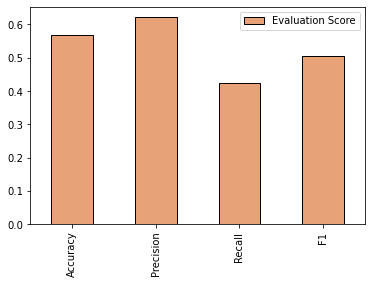

In [60]:
evaluation_scores.T.plot(kind='bar',color='#e7a377',edgecolor='black')

In [31]:
print(f"Classification Report: \n\n{classification_report(y_valid,y_preds)}")


Classification Report: 

              precision    recall  f1-score   support

           0       0.54      0.73      0.62        73
           1       0.62      0.42      0.50        78

    accuracy                           0.57       151
   macro avg       0.58      0.57      0.56       151
weighted avg       0.58      0.57      0.56       151



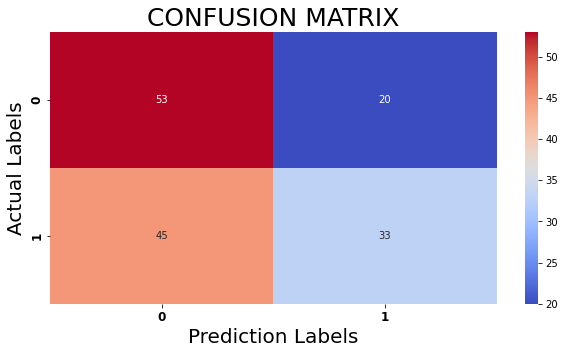

In [54]:
cn_matrix = confusion_matrix(y_valid,y_preds)

plt.figure(figsize=(10,5))
sns.heatmap(cn_matrix,
           annot=True,
           cmap='coolwarm')
plt.title('CONFUSION MATRIX',fontsize=25)
plt.xlabel('Prediction Labels',fontsize=20)
plt.ylabel('Actual Labels',fontsize=20)
plt.xticks(fontsize= 12 ,fontweight='bold')
plt.yticks(fontsize= 12 ,fontweight='bold');

C:\Users\prvzs\miniconda3\envs\mysongenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


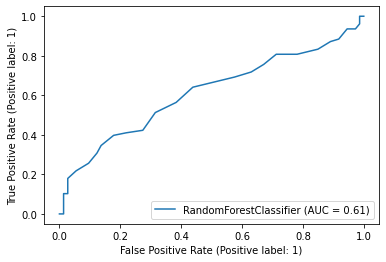

In [43]:
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(rfc,X_valid,y_valid);

## Feature Importance

In [51]:
rf_features = rfc.feature_importances_
rf_features

array([0.00145208, 0.00186047, 0.00210809, 0.00136018, 0.        ,
       0.00210446, 0.00175831, 0.00224185, 0.00317101, 0.00248904,
       0.00116513, 0.        , 0.00095397, 0.0018007 , 0.00257195,
       0.0023787 , 0.00179763, 0.00071091, 0.        , 0.00199236,
       0.00184972, 0.00157483, 0.00261647, 0.00164371, 0.00190768,
       0.        , 0.0016889 , 0.00204032, 0.00240996, 0.00321432,
       0.00225659, 0.00261479, 0.        , 0.0016102 , 0.00125879,
       0.00220487, 0.00202852, 0.00208873, 0.00182601, 0.        ,
       0.00192808, 0.00156598, 0.00134882, 0.00283285, 0.00187808,
       0.00270788, 0.00010031, 0.00215046, 0.00175244, 0.0018035 ,
       0.00180996, 0.00144888, 0.00135234, 0.        , 0.00139994,
       0.00369449, 0.00142264, 0.00100363, 0.00248078, 0.00151108,
       0.        , 0.0042471 , 0.00137601, 0.00119338, 0.00181468,
       0.0015101 , 0.00205023, 0.        , 0.00341924, 0.00247976,
       0.00271616, 0.00246674, 0.00154914, 0.00130355, 0.     

In [49]:
dataset.columns

Index(['Artist', 'Title', 'Label', 'chroma_stft_kew_0', 'chroma_stft_min_0',
       'chroma_stft_max_0', 'chroma_stft_std_0', 'chroma_stft_mean_0',
       'chroma_stft_median_0', 'chroma_stft_kurtosis_0',
       ...
       'tonnetz_mean_5', 'tonnetz_median_5', 'tonnetz_kurtosis_5',
       'zero_crossing_rate_kew_0', 'zero_crossing_rate_min_0',
       'zero_crossing_rate_max_0', 'zero_crossing_rate_std_0',
       'zero_crossing_rate_mean_0', 'zero_crossing_rate_median_0',
       'zero_crossing_rate_kurtosis_0'],
      dtype='object', length=521)

In [77]:
features_df = pd.concat([pd.Series(dataset.columns,name='Features'),pd.Series(rf_features,name='Score')],axis=1)
features_df.sort_values(by='Score',ascending=False,inplace=True)
features_df.head()

,Features,Score
236,chroma_cens_max_9,0.005226
421,spectral_contrast_median_0,0.004843
152,chroma_cqt_max_9,0.004694
234,chroma_cens_kew_9,0.004436
310,mfcc_kurtosis_7,0.004366
